In [23]:
# Bandymai su sintetiniais duomenimis pritaikyti klasifikacijai tf.data.dataset,
# tiek su duomenimis RAM-e, tiek įmant juos iš csv porcijomis, įrašyto diske
# Palyginimui klasifikuojama naudojant ir numpy formato duomenis
# Pabaigoje yra normalizacijos būdų sulyginimas

# https://machinelearningmastery.com/a-gentle-introduction-to-tensorflow-data-api/
# https://www.tensorflow.org/guide/data

import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import time

def runtime(s):
    hours, remainder = divmod(s, 3600)
    minutes, seconds = divmod(remainder, 60)
    print('Runtime: {:02}:{:02}:{:02}'.format(int(hours), int(minutes), int(seconds)))
    return hours, minutes, seconds

def count_lines_enumrate(file_name):
# Funkcija csv failo eilučių skaičiaus suradimui
# https://insightsndata.com/6-ways-to-find-number-of-lines-from-a-csv-file-in-python-b22eb63f7f7c

    fp = open(file_name,'r')
    for line_count, line in enumerate(fp):
        pass
    return line_count


import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)

2.6.0


In [24]:
# GENERUOJAME DUOMENIS KLASIFIKAVIMUI IR ĮRAŠOME Į DISKĄ CSV FORMATU
# Duomenys formatu numpy ir Pandas df

#   Generuojame 3 klases 0 ir 1,2
# https://proclusacademy.com/blog/sklearn_make_classification/

n_samples=1000 # n observations 
n_features=5 # 5 total features
n_informative=3 # 3 'useful' features
n_classes=3 # binary target/label 
random_state=999 # if you want the same results as mine

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_classes=n_classes, 
    random_state=random_state
)

print("\nĮvairių duomenų pateikimo į Tensorflow būdų bandymai ir sulyginimas")
print("\nDuomenys iš make_classification:")
print(f"n_samples: {n_samples}  n_features: {n_features} useful features: {n_informative}")
print(f"n_classes: {n_classes}  random_state: {random_state}")

# split into train test sets
# Train-Test Split for Evaluating Machine Learning Algorithms
# https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Toliau paverčiame duomenis į Pandas df formatą, kad būtų patogiau
# pasižiūrėti, kas per duomenys

# Training samples

# Create DataFrame with features as columns
df_train = pd.DataFrame(X_train)
# give custom names to the features

features = ['X1', 'X2', 'X3', 'X4', 'X5']
df_train.columns = features
# Now add the label as a column
df_train['y'] = y_train

print("\n", "TRAIN DATA:")
df_train.info()
print("\n")
print(df_train.head())
print("\n")
print(df_train['y'].value_counts())

# Testing samples

df_test = pd.DataFrame(X_test)
# give custom names to the features

features = ['X1', 'X2', 'X3', 'X4', 'X5']
df_test.columns = features
# Now add the label as a column
df_test['y'] = y_test

print("\n", "TEST DATA:")
df_test.info()
print("\n")
print(df_test.head())
print("\n")
print(df_test['y'].value_counts())

# Įrašome numpy duomenis į csv failą

# pandas.DataFrame.to_csv
# From <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html> 

# from pathlib import Path  
# filepath = Path('folder/subfolder/out.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)
# filepath_train = Path('train.csv')  

filepath_train = 'train_sintet.csv'  
filepath_test = 'test_sintet.csv'  

print()
print(f"Training data: {filepath_train}")
print(f"Testing data: {filepath_test}")

df_train.to_csv(filepath_train, index=False)  
df_test.to_csv(filepath_test, index=False)  


Įvairių duomenų pateikimo į Tensorflow būdų bandymai ir sulyginimas

Duomenys iš make_classification:
n_samples: 1000  n_features: 5 useful features: 3
n_classes: 3  random_state: 999

 TRAIN DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      670 non-null    float64
 1   X2      670 non-null    float64
 2   X3      670 non-null    float64
 3   X4      670 non-null    float64
 4   X5      670 non-null    float64
 5   y       670 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.5 KB


         X1        X2        X3        X4        X5  y
0 -1.399914 -1.250168 -0.208695  1.374362 -0.416437  1
1 -1.644765 -1.191296 -0.348938  0.559789 -1.212534  1
2  0.097409 -0.730713  0.710955 -0.943922 -0.525231  1
3  1.075153 -1.097116  1.666505 -0.699692  0.615414  1
4  0.517154 -1.251005  1.581911 -2.750345 -1.323126  2


1    226
2    22

[1 1]
[[0. 1. 0.]
 [0. 1. 0.]]
X_train.shape: (670, 5)
Epoch 1/10
67/67 [==============================] - 1s 8ms/step - loss: 0.6825 - accuracy: 0.7328 - val_loss: 0.4931 - val_accuracy: 0.8273
Epoch 2/10
67/67 [==============================] - 0s 7ms/step - loss: 0.4437 - accuracy: 0.8478 - val_loss: 0.4011 - val_accuracy: 0.8576
Epoch 3/10
67/67 [==============================] - 0s 5ms/step - loss: 0.3850 - accuracy: 0.8642 - val_loss: 0.3918 - val_accuracy: 0.8667
Epoch 4/10
67/67 [==============================] - 1s 8ms/step - loss: 0.3639 - accuracy: 0.8582 - val_loss: 0.3637 - val_accuracy: 0.8697
Epoch 5/10
67/67 [==============================] - ETA: 0s - loss: 0.3643 - accuracy: 0.86 - 0s 5ms/step - loss: 0.3588 - accuracy: 0.8642 - val_loss: 0.3739 - val_accuracy: 0.8545
Epoch 6/10
67/67 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.8657 - val_loss: 0.3658 - val_accuracy: 0.8636
Epoch 7/10
67/67 [==============================] - 0s 5ms/step

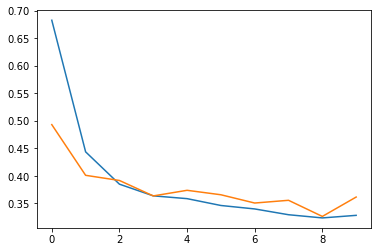

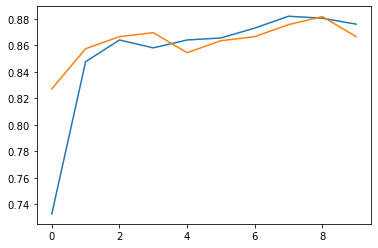

11/11 [==============================] - 0s 4ms/step - loss: 0.3617 - accuracy: 0.8667
i: 0 accuracy: 0.87

Duomenys pateikiami numpy formatu
mokymo imtis: 670
batch_size: 10
experiment_cycles: 1


Average accuracy: 86.67
Runtime: 00:00:04


In [25]:
# KLASIFIKUOJAME su numpy array

# https://faroit.com/keras-docs/2.1.2/getting-started/sequential-model-guide/
# For a single-input model with 2 classes (binary classification):
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# Your First Deep Learning Project in Python with Keras Step-by-Step
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://www.projectpro.io/recipes/run-and-fit-data-with-keras-model

experiment_cycles = 1
verbose = 1
epochs = 10
batch_size = 10

# Kartojame mokymą experiment_cycles kartų ir vidurkiname

#       MODELIS
# 
normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

y_train_cat = to_categorical(y_train)
print(y_train[:2])
print(y_train_cat[:2])
y_test_cat = to_categorical(y_test)

model = tf.keras.Sequential()
model.add(normalize)
model.add( tf.keras.layers.Dense(16, activation='relu', input_dim=(5,)))
model.add( tf.keras.layers.Dense(32, activation='relu'))
model.add( tf.keras.layers.Dense(3, activation='softmax')) # softmax for multiclass
model.compile(tf.keras.optimizers.Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
# history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,  verbose=verbose, validation_data=(X_test, y_test))
print(f'X_train.shape: {X_train.shape}')

avg_accuracy = 0
for i in range(experiment_cycles):
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History
    history = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, 
                                     verbose=verbose, validation_data=(X_test, y_test_cat))
    print("\n",history.params)

    #   APMOKYMO ISTORIJA
#  
    # print(model.evaluate(test_image, test_label))
    print(history.history.keys()) 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.show()

# evaluate the keras model
    _, accuracy = model.evaluate(X_test, y_test_cat)
    print(f"i: {i} accuracy: {accuracy:.2f}")
    avg_accuracy += accuracy
avg_accuracy1 = avg_accuracy/experiment_cycles  

print("\nDuomenys pateikiami numpy formatu")
print(f'mokymo imtis: {len(X_train)}')
print(f'batch_size: {batch_size}')
print(f"experiment_cycles: {experiment_cycles}\n")
print('\nAverage accuracy: %.2f' % (avg_accuracy1*100))

end_time = time.time()
hours1, minutes1, seconds1 = runtime(end_time-start_time)


In [26]:
# Confusion matrix, classification_report

from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

y_test_class = np.argmax(y_test_cat, axis=1)
print(y_test_class)

print('\nconfusion_matrix\n')
print(confusion_matrix(y_test_class, y_pred_class))

print('\nclassification_report\n')
print(classification_report(y_test_class, y_pred_class))


[1 1 2 2 1 0 0 2 1 0 1 1 1 1 1 1 1 0 1 1 1 2 0 2 0 2 2 0 1 0 1 1 2 1 0 1 0
 0 1 1 2 1 0 1 2 2 1 1 1 2 0 2 0 1 0 1 0 2 1 2 2 0 0 0 2 2 1 2 1 0 2 0 0 1
 2 0 0 0 1 1 0 0 2 2 2 2 0 0 2 2 0 2 1 1 1 0 0 2 0 2 1 2 0 1 1 2 0 1 2 1 1
 0 0 1 1 0 1 2 0 0 2 2 0 1 2 0 2 2 1 0 0 1 0 0 2 2 1 0 2 0 2 1 1 0 0 1 0 2
 0 0 0 1 2 2 1 1 2 0 0 1 0 0 2 0 1 2 2 2 0 0 1 2 0 0 2 2 1 1 0 0 0 2 1 2 2
 2 1 0 1 2 1 0 2 2 1 2 0 0 1 0 0 1 0 2 1 2 0 1 0 1 0 1 2 0 1 2 0 1 0 1 0 1
 2 2 1 1 2 0 2 2 0 1 0 0 1 2 1 1 0 2 2 2 0 2 2 1 1 1 0 1 2 1 2 1 1 0 2 1 0
 0 2 1 1 2 1 0 1 0 2 2 2 2 0 1 0 0 0 0 0 1 0 1 2 2 0 2 1 0 1 2 1 2 2 1 2 1
 1 2 1 2 1 2 1 1 1 2 0 1 1 1 2 2 1 2 1 1 2 1 1 1 2 0 1 1 0 1 1 1 2 2]
[1 1 0 0 1 2 0 2 1 0 1 1 1 1 2 1 1 0 1 1 1 2 0 0 1 2 2 0 2 0 1 1 2 1 0 1 1
 0 1 1 2 1 0 1 2 2 1 1 1 2 0 2 0 1 0 2 0 2 1 2 2 0 0 0 2 2 1 2 1 0 2 0 0 1
 2 0 0 0 1 1 0 0 2 2 2 0 0 0 2 2 0 2 1 1 0 0 0 2 0 2 1 2 0 1 2 2 0 1 2 1 0
 0 0 1 1 1 0 2 0 0 2 2 0 0 2 0 2 2 1 2 1 1 0 0 0 2 1 0 0 0 2 1 1 0 0 1 0 2
 0 0 0 1 2 2 1 1 1 0 0 1 0 1 2

In [27]:
# KLASIFIKUOJAME su tf.data.dataset 

# PERTVARKOME DUOMENIS Į FORMATĄ tf.data.dataset, variantas RAM

# print("\n")
training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_train[features].values, tf.float32),
            tf.cast(df_train['y'].values, tf.int32)
        )
    )
)

training_dataset = training_dataset.batch(10).map(lambda x, y: (x, tf.one_hot(y, depth=3)))
ds_cardinality = batch_size*training_dataset.cardinality().numpy()
print(f'\ntraining_dataset.cardinality: {ds_cardinality}\n')


# for row in training_dataset.take(3):
#   print(row)
# print("\n", training_dataset.element_spec)

# print("\n")
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_test[features].values, tf.float32),
            tf.cast(df_test['y'].values, tf.int32)
        )
    )
)

testing_dataset = testing_dataset.batch(10).map(lambda x, y: (x, tf.one_hot(y, depth=3)))
ds_cardinality = batch_size*testing_dataset.cardinality().numpy()
print(f'\ntesting_dataset.cardinality: {ds_cardinality}\n')

# for row in testing_dataset.take(3):
#   print(row)
# print("\n", testing_dataset.element_spec)


#       PARUOŠIAME MODELĮ IR APMOKOME

# https://faroit.com/keras-docs/2.1.2/getting-started/sequential-model-guide/
# For a single-input model with 2 classes (binary classification):
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential


normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

model = tf.keras.Sequential()
model.add(normalize)
model.add( tf.keras.layers.Dense(32, activation='relu', input_dim=5))
model.add( tf.keras.layers.Dense(3, activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])

start_time = time.time()

avg_accuracy = 0
for i in range(experiment_cycles):
    # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History
    history = model.fit(training_dataset, epochs=epochs, verbose=verbose,  validation_data=testing_dataset)
    # print("\n",history.params)

#       APMOKYMO ISTORIJA
#  
# print(history.history.keys()) 
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.show()
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.show()


# evaluate the keras model
    _, accuracy = model.evaluate(testing_dataset)
    print(f"i: {i} accuracy: {accuracy:.2f}")
    avg_accuracy += accuracy

avg_accuracy2 = avg_accuracy/experiment_cycles    

print("\nDuomenys pateikiami tf.data.dataset formatu iš RAM")
print(f"experiment_cycles: {experiment_cycles}")
print('\nAverage accuracy: %.2f' % (avg_accuracy2*100))

end_time = time.time()
hours2, minutes2, seconds2 = runtime(end_time-start_time)



training_dataset.cardinality: 670


testing_dataset.cardinality: 330

Epoch 1/10
67/67 [==============================] - 1s 7ms/step - loss: 0.6493 - accuracy: 0.7582 - val_loss: 0.4791 - val_accuracy: 0.8152
Epoch 2/10
67/67 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8522 - val_loss: 0.4067 - val_accuracy: 0.8576
Epoch 3/10
67/67 [==============================] - 0s 5ms/step - loss: 0.4123 - accuracy: 0.8672 - val_loss: 0.3872 - val_accuracy: 0.8667
Epoch 4/10
67/67 [==============================] - 0s 5ms/step - loss: 0.3928 - accuracy: 0.8746 - val_loss: 0.3792 - val_accuracy: 0.8667
Epoch 5/10
67/67 [==============================] - 0s 4ms/step - loss: 0.3798 - accuracy: 0.8761 - val_loss: 0.3708 - val_accuracy: 0.8636
Epoch 6/10
67/67 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.8761 - val_loss: 0.3659 - val_accuracy: 0.8697
Epoch 7/10
67/67 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy

In [29]:
# Paruošiame tf.data.dataset, gaunamą iš CSV failo
# https://colab.research.google.com/github/tfindiamooc/tfindiamooc.github.io/blob/master/colabs/csv.ipynb#scrollTo=1VBvmaFrFU6J

  # TRAIN DATASET

print("\nTrain dataset")
# Eilučių skaičius csv masyve ir batch size
number_of_rows = count_lines_enumrate(filepath_train)
print(f'number_of_rows: {number_of_rows} batch size: {batch_size}')

dt_train_raw = tf.data.experimental.make_csv_dataset(
    filepath_train,
    batch_size=batch_size, # Artificially small to make examples easier to show.
    label_name='y',
    num_epochs=1,
    ignore_errors=True,)

# for batch, label in dt_train_raw.take(1):
#   for key, value in batch.items():
#     print(f"{key:20s}: {value}")
#   print()
#   print(f"{'y':20s}: {label}")  

def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label

# Apply this to each element of the dataset:

dt_train = dt_train_raw.map(pack)
dt_train = dt_train.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

print(f'\ndt_train.element_spec: {dt_train.element_spec}')

print()
for features, labels in dt_train.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())


  # TEST DATASET

print("\nTest dataset")
# Eilučių skaičius csv masyve ir batch size
number_of_rows = count_lines_enumrate(filepath_test)
print(f'number_of_rows: {number_of_rows} batch size: {batch_size}')

dt_test_raw = tf.data.experimental.make_csv_dataset(
    filepath_test,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='y',
    num_epochs=1,
    ignore_errors=True,)

dt_test = dt_test_raw.map(pack)
dt_test = dt_test.map(lambda x, y: (x, tf.one_hot(y, depth=3)))




Train dataset
number_of_rows: 670 batch size: 10

dt_train.element_spec: (TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))

[[ 1.686109    0.5561305   0.86982125 -0.7134761   1.1657481 ]
 [ 1.5304631  -0.38534126  1.3805707   0.12061625  1.6029137 ]
 [-2.277767   -1.5587838  -0.6075801   1.3440045  -1.2955717 ]
 [ 1.0889176  -1.058824    1.6751148  -0.9768332   0.43990976]
 [ 0.36604834  1.7048185  -0.96795046 -0.45928234  0.00485199]
 [-1.4009415  -1.0260768  -0.28978983  0.4880091  -1.0248826 ]
 [ 0.6944012  -1.5626677   1.7741175  -1.0379078   0.02222778]
 [ 2.2736442  -1.6204681   2.8581336  -0.04321083  2.257897  ]
 [ 0.51716626 -0.59979     0.7995547   0.23094095  0.6830655 ]
 [ 1.464908    1.810498   -0.3303819   0.30770102  1.6074307 ]]

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

Test dataset
number_of_rows: 330 batch size: 10


In [7]:
# KLASIFIKUOJAME su tf.data.dataset, GAUTO IŠ CSV FAILO

normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

model = tf.keras.Sequential()
model.add(normalize)
model.add( tf.keras.layers.Dense(32, activation='relu', input_dim=5))
model.add( tf.keras.layers.Dense(3, activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])

start_time = time.time()
epochs = 10
verbose = 2
experiment_cycles = 1

avg_accuracy = 0
for i in range(experiment_cycles):
  history = model.fit(dt_train, epochs=epochs, validation_data=dt_test, verbose=verbose)

# evaluate the keras model
  _, accuracy = model.evaluate(dt_test)
  print(f"i: {i} accuracy: {accuracy:.2f}")
  avg_accuracy += accuracy

avg_accuracy3 = avg_accuracy/experiment_cycles 

print("\nDuomenys pateikiami tf.data.dataset formatu iš failo")
print(f"experiment_cycles: {experiment_cycles}")
print('\nAverage accuracy: %.2f' % (avg_accuracy3*100))

end_time = time.time()
hours3, minutes3, seconds3 = runtime(end_time-start_time)


Epoch 1/10
67/67 - 1s - loss: 0.6307 - accuracy: 0.7776 - val_loss: 0.4769 - val_accuracy: 0.8333
Epoch 2/10
67/67 - 0s - loss: 0.4491 - accuracy: 0.8403 - val_loss: 0.4101 - val_accuracy: 0.8485
Epoch 3/10
67/67 - 1s - loss: 0.4038 - accuracy: 0.8567 - val_loss: 0.3763 - val_accuracy: 0.8545
Epoch 4/10
67/67 - 0s - loss: 0.3852 - accuracy: 0.8597 - val_loss: 0.3641 - val_accuracy: 0.8667
Epoch 5/10
67/67 - 0s - loss: 0.3802 - accuracy: 0.8612 - val_loss: 0.3630 - val_accuracy: 0.8515
Epoch 6/10
67/67 - 0s - loss: 0.3660 - accuracy: 0.8701 - val_loss: 0.3797 - val_accuracy: 0.8636
Epoch 7/10
67/67 - 1s - loss: 0.3516 - accuracy: 0.8731 - val_loss: 0.3615 - val_accuracy: 0.8455
Epoch 8/10
67/67 - 0s - loss: 0.3423 - accuracy: 0.8716 - val_loss: 0.3430 - val_accuracy: 0.8667
Epoch 9/10
67/67 - 0s - loss: 0.3358 - accuracy: 0.8791 - val_loss: 0.3614 - val_accuracy: 0.8576
Epoch 10/10
67/67 - 0s - loss: 0.3324 - accuracy: 0.8776 - val_loss: 0.3845 - val_accuracy: 0.8364
66/66 [============

In [8]:
print("\nDuomenys iš make_classification:")
print(f"n_samples: {n_samples}  n_features: {n_features} useful features: {n_informative}")
print(f"n_classes: {n_classes}  random_state: {random_state}")
print(f"train length: {y_train.shape[0]}  test length: {y_test.shape[0]} ")

print(f"\nexperiment_cycles: {experiment_cycles}")
print(f'Average accuracy: {avg_accuracy1*100:.2f} Runtime: {int(hours3):2d}:{int(minutes3):2d}:{int(seconds3):2d}')
print(f'Average accuracy: {avg_accuracy2*100:.2f} Runtime: {int(hours3):2d}:{int(minutes3):2d}:{int(seconds3):2d}')
print(f'Average accuracy: {avg_accuracy3*100:.2f} Runtime: {int(hours3):2d}:{int(minutes3):2d}:{int(seconds3):2d}')



Duomenys iš make_classification:
n_samples: 1000  n_features: 5 useful features: 3
n_classes: 3  random_state: 999
train length: 670  test length: 330 

experiment_cycles: 1
Average accuracy: 86.67 Runtime:  0: 0: 6
Average accuracy: 88.48 Runtime:  0: 0: 6
Average accuracy: 83.64 Runtime:  0: 0: 6


In [9]:
# Bandymai surasti būdus klasifikacijos rezultatams surasti iš tf.data.dataset

from sklearn.metrics import confusion_matrix, classification_report
# https://stackoverflow.com/questions/66672375/tf-accuracy-score-and-confusion-matrix-disagree-is-tensorflow-shuffling-data-on

y_pred_class = np.array([])
y_true_class = np.array([])

# iterate over the dataset
for feature_batch, label_batch in dt_test:   # use dataset.unbatch() with repeat
  
   # append true labels
   true_class_batch = np.argmax(label_batch, axis=1)
   # print(true_class)
   y_true_class = np.concatenate([y_true_class, true_class_batch])

   # compute predictions
   preds_batch = model.predict(feature_batch)
   # append predicted labels
   pred_class_batch = np.argmax(preds_batch, axis = 1)
   # print(pred_class)
   y_pred_class = np.concatenate([y_pred_class, pred_class_batch])

print('\ny_true_class:')
print(y_true_class)
print('\ny_pred_class:')
print(y_pred_class)

print('\nconfusion_matrix\n')
print(confusion_matrix(y_true_class, y_pred_class))

print('\nclassification_report\n')
print(classification_report(y_true_class, y_pred_class))



y_true_class:
[2. 1. 2. 0. 0. 2. 1. 2. 0. 2. 1. 2. 2. 1. 1. 2. 1. 1. 2. 0. 2. 2. 1. 2.
 2. 0. 2. 1. 1. 0. 1. 2. 0. 1. 2. 1. 2. 2. 0. 1. 2. 2. 0. 0. 1. 1. 0. 0.
 0. 2. 2. 1. 1. 0. 1. 2. 0. 2. 0. 1. 0. 0. 2. 0. 1. 1. 2. 0. 2. 0. 0. 0.
 0. 2. 0. 2. 1. 2. 1. 2. 1. 2. 2. 0. 1. 0. 2. 1. 2. 2. 2. 0. 1. 2. 1. 2.
 1. 2. 0. 1. 1. 0. 1. 2. 0. 2. 0. 2. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 2. 0.
 1. 2. 0. 0. 2. 1. 1. 0. 2. 1. 0. 1. 1. 2. 2. 2. 1. 2. 1. 0. 1. 1. 0. 1.
 1. 2. 1. 1. 0. 2. 2. 2. 1. 2. 0. 2. 2. 1. 0. 2. 2. 0. 1. 0. 2. 2. 0. 2.
 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 0. 2. 0. 0. 1. 0. 1. 1.
 2. 2. 0. 2. 0. 2. 0. 1. 0. 1. 1. 2. 0. 0. 2. 0. 2. 1. 0. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 0. 2. 0. 2. 0. 1. 1. 0. 1. 1. 0. 2. 0. 0. 0. 2. 0. 2.
 2. 1. 1. 0. 1. 1. 0. 1. 2. 2. 2. 0. 1. 1. 0. 0. 0. 2. 2. 0. 0. 0. 0. 1.
 1. 1. 1. 2. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 2. 1. 0. 0. 0.
 2. 0. 1. 1. 1. 1. 2. 2. 2. 0. 1. 0. 0. 2. 1. 2. 0. 2. 1. 2. 0. 2. 0. 2.
 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 1. 1.

In [10]:
# Bandymai su normalizacija - trijų būdų sulyginimas


filepath = filepath_train

# 1-as būdas: skaičiuojame MEAN ir VAR tiesiai ių imties

print('\n1-as būdas: skaičiuojame MEAN ir VAR tiesiai ių imties')
df = pd.read_csv(filepath)
print(df.head())
df.drop('y', inplace=True, axis=1)
X_train = df.to_numpy()
print(X_train.shape)

MEAN = np.mean(X_train, axis=0)
STD = np.std(X_train, axis=0)
VAR = np.var(X_train, axis=0)
print(f'\nMEAN: {MEAN}')
print(f'STD: {STD}')
print(f'VAR: {VAR}')


# 2-as būdas: skaičiuojame MEAN ir VAR iš tf.data.dataset

# Apskaičiuojame MEAN, STD, VAR iš atsitiktinių partijų. Skaičiuojama 
# atsitiktiniu būdu generuojant partijas. Ar pereinama per visas
# eilutes, priklauso nuo esančio take(N) skaičiaus

print('\n2-as būdas: skaičiuojame MEAN ir VAR naudojant tf.data.dataset')
take_N = 67
length = n_features

# Eilučių skaičius csv masyve
number_of_rows = count_lines_enumrate(filepath)
rate = 100*batch_size*take_N/number_of_rows

print(f'\nnumber_of_rows: {number_of_rows} take_N: {take_N} batch_size: {batch_size}  rate: {rate:.1f}%'  )

np_features_set = np.empty((0,length),float)

for features, labels in dt_train.take(take_N):
    block = features.numpy()
    np_features_set= np.append(np_features_set, block, axis=0)

MEAN = np.mean(np_features_set, axis=0)
STD = np.std(np_features_set, axis=0)
VAR = np.var(np_features_set, axis=0)
print(f'\nMEAN: {MEAN}')
print(f'STD: {STD}')
print(f'VAR: {VAR}')

# 3-as būdas: skaičiuojame MEAN ir VAR su normalize.append

print('\n3-as būdas: skaičiuojame MEAN ir VAR naudojant normalize.append')
normalize = tf.keras.layers.Normalization()
# https://github.com/tensorflow/tensorflow/issues/44160
feature_ds = dt_train.map(lambda x, y: x)
normalize.adapt(feature_ds)
# print(normalize.weights)
MEAN = normalize.get_weights()[0]
VAR = normalize.get_weights()[1]
print(f'\nMEAN: {MEAN}')
print(f'VAR: {VAR}')




1-as būdas: skaičiuojame MEAN ir VAR tiesiai ių imties
         X1        X2        X3        X4        X5  y
0 -1.399914 -1.250168 -0.208695  1.374362 -0.416437  1
1 -1.644765 -1.191296 -0.348938  0.559789 -1.212534  1
2  0.097409 -0.730713  0.710955 -0.943922 -0.525231  1
3  1.075153 -1.097116  1.666505 -0.699692  0.615414  1
4  0.517154 -1.251005  1.581911 -2.750345 -1.323126  2
(670, 5)

MEAN: [ 0.29248962 -0.04506807  0.21074506  0.34389573  0.52333113]
STD: [1.31706148 1.3544179  1.50159282 1.22602826 1.3546837 ]
VAR: [1.73465095 1.83444785 2.254781   1.50314528 1.83516794]

2-as būdas: skaičiuojame MEAN ir VAR naudojant tf.data.dataset

number_of_rows: 670 take_N: 67 batch_size: 10  rate: 100.0%

MEAN: [ 0.29248962 -0.04506807  0.21074506  0.34389573  0.52333113]
STD: [1.31706148 1.3544179  1.50159282 1.22602826 1.3546837 ]
VAR: [1.73465095 1.83444785 2.254781   1.50314529 1.83516793]

3-as būdas: skaičiuojame MEAN ir VAR naudojant normalize.append

MEAN: [ 0.29248974 -0.045068

In [11]:
df = pd.DataFrame({"a": [1,2,3], "b":[2,4,6]})
print("The DataFrame object before deleting the column")
print(df)
df.drop('a', inplace=True, axis=1)
print("The DataFrame object after deleting the column a")
print(df)

The DataFrame object before deleting the column
   a  b
0  1  2
1  2  4
2  3  6
The DataFrame object after deleting the column a
   b
0  2
1  4
2  6
